In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])
import scipy as sc

# Basic

## Optimization

In [89]:
from scipy.optimize import minimize

Minimize $f(x)$ = $(x-3)^2$

In [4]:
def f(x):
    return (x-3)**2

res = minimize(f,2)

In [5]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.551437397369767e-17
        x: [ 3.000e+00]
      nit: 2
      jac: [-4.325e-13]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

In [6]:
res.x[0]

2.999999992549203

Minimize $f(x,y)$ = $(x-1)^2$ + $(y-2.5)^2$ subjected to these constraints

$$ x-2y+2\ge{0} $$
$$ -x-2y+6\ge 0 $$
$$ -x+2y+2\ge{0} $$
$$ x\ge{0} $$
$$ y\ge{0} $$

In [10]:
 f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type':'ineq', 'fun': lambda x: x[0]-2*x[1]+2},
        {'type':'ineq', 'fun': lambda x: -x[0]-2*x[1]+6},
        {'type':'ineq', 'fun': lambda x: -x[0]+2*x[1]+2},
       )
bnds = ((0, None), (0, None))
res = minimize(f, (2,0), bounds=bnds, constraints=cons)

In [12]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.8000000011920985
       x: [ 1.400e+00  1.700e+00]
     nit: 3
     jac: [ 8.000e-01 -1.600e+00]
    nfev: 10
    njev: 3

In [13]:
res.x

array([1.4, 1.7])

# Interpolation

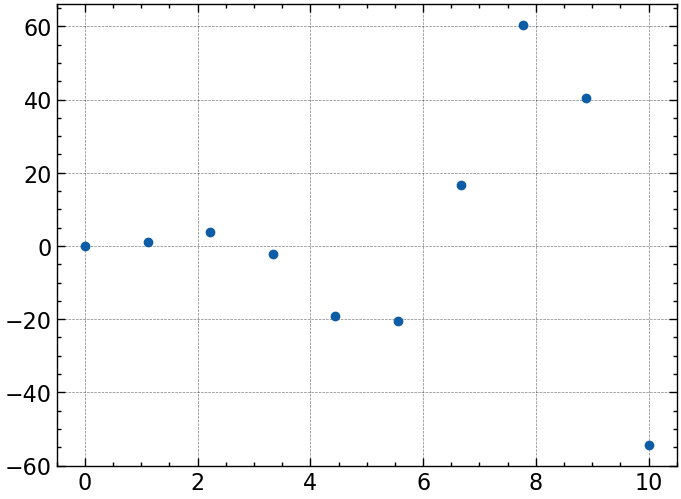

In [14]:
x = np.linspace(0,10,10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

In [16]:
from scipy.interpolate import interp1d

In [17]:
f = interp1d(x, y, kind='linear')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

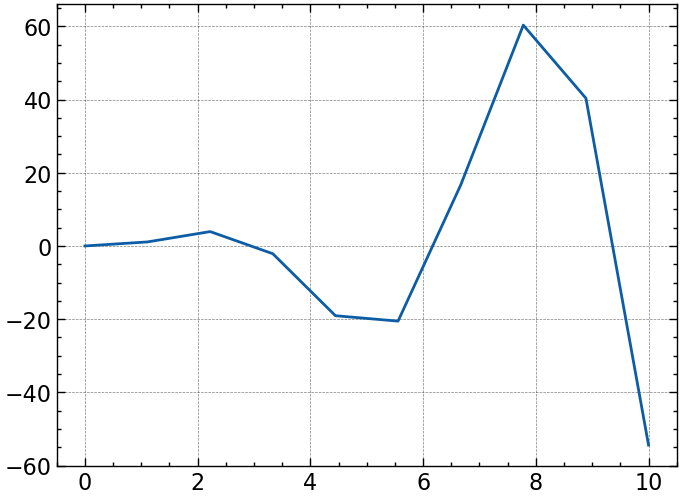

In [18]:
plt.plot(x_dense, y_dense)

In [21]:
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

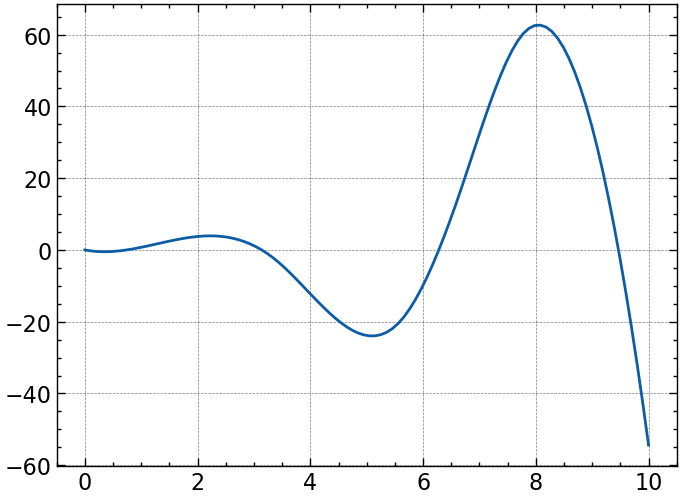

In [22]:
plt.plot(x_dense, y_dense)

# Curve Fitting

In [26]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

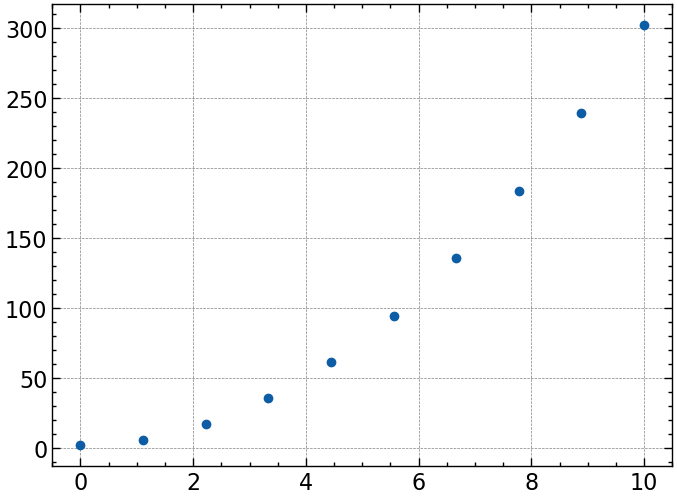

In [27]:
plt.scatter(x_data, y_data)

Want to find data to the curve $ y = ax^2 + b $. The main goal here is determine the values of a and b.

In [28]:
from scipy.optimize import curve_fit

In [29]:
def f(x, a, b):
    return a*x**2 + b

popt, pcov = curve_fit(f, x_data, y_data, p0=(1,1))

In [30]:
popt

array([3., 2.])

In [31]:
pcov

array([[ 4.13297331e-34, -1.45419433e-32],
       [-1.45419433e-32,  9.65872308e-31]])

In [32]:
err = np.sqrt(np.diag(pcov))

In [35]:
true_values = popt - err

In [36]:
true_values

array([3., 2.])

# Special Functions

Legendre Polynomials $P_l(x)$ : satisfy $ (1-x^2)y" - 2xy' + l(l+1)y = 0 $

The angular component of the spherical Schrodinger Equation which permits non-infinite solutions

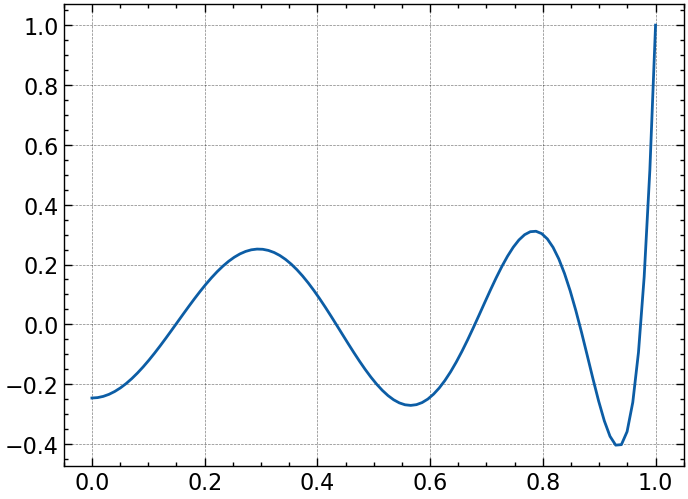

In [29]:
from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(10)(x))
plt.show()

Bessel function $J_\alpha(x)$: satisfy $ x^2y^" + xy' + (x^2 - \alpha^2)y = 0 $

Laplace's Equation in Polar Coordinates

<function matplotlib.pyplot.show(close=None, block=None)>

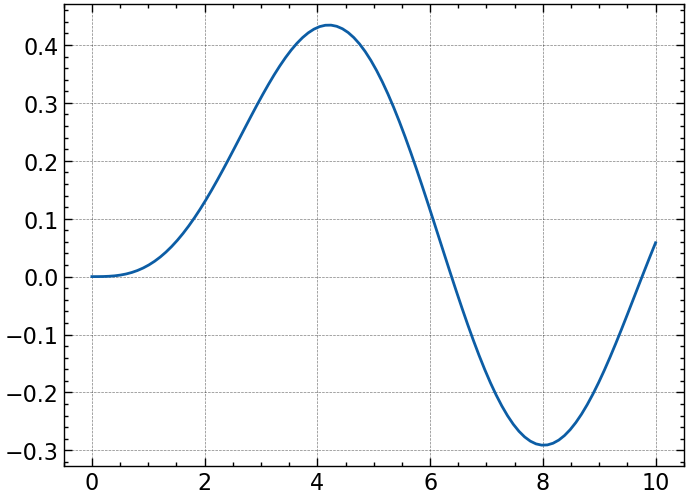

In [41]:
from scipy.special import jv
x = np.linspace(0, 10, 100)
plt.plot(x, jv(3,x))
plt.show

# Calculus

## Differentiation

In [36]:
from scipy.misc import derivative

In [54]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)

x = np.linspace(0, 1, 100)

In [56]:
Dy = derivative(f, x, dx=1e-6)

C:\Users\saura\AppData\Local\Temp\ipykernel_5936\3596823753.py:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  Dy = derivative(f, x, dx=1e-6)


In [58]:
Dy

array([2.00000000e-12, 6.03920829e-04, 2.38251311e-03, 5.28577629e-03,
       9.26344114e-03, 1.42650411e-02, 2.02399819e-02, 2.71376096e-02,
       3.49072761e-02, 4.34984041e-02, 5.28605490e-02, 6.29434594e-02,
       7.36971364e-02, 8.50718897e-02, 9.70183930e-02, 1.09487737e-01,
       1.22431481e-01, 1.35801703e-01, 1.49551043e-01, 1.63632755e-01,
       1.78000746e-01, 1.92609622e-01, 2.07414723e-01, 2.22372164e-01,
       2.37438874e-01, 2.52572626e-01, 2.67732071e-01, 2.82876773e-01,
       2.97967232e-01, 3.12964916e-01, 3.27832284e-01, 3.42532814e-01,
       3.57031020e-01, 3.71292476e-01, 3.85283835e-01, 3.98972845e-01,
       4.12328366e-01, 4.25320382e-01, 4.37920015e-01, 4.50099539e-01,
       4.61832383e-01, 4.73093145e-01, 4.83857594e-01, 4.94102681e-01,
       5.03806534e-01, 5.12948470e-01, 5.21508990e-01, 5.29469779e-01,
       5.36813708e-01, 5.43524827e-01, 5.49588364e-01, 5.54990719e-01,
       5.59719457e-01, 5.63763301e-01, 5.67112124e-01, 5.69756939e-01,
      

C:\Users\saura\AppData\Local\Temp\ipykernel_31244\3771715124.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx=1e-6, n=2))


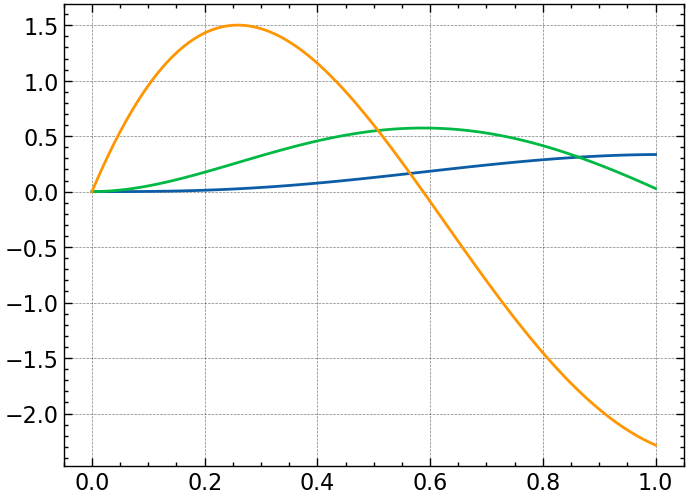

In [46]:
plt.plot(x, f(x))
plt.plot(x, Dy)
plt.plot(x, derivative(f, x, dx=1e-6, n=2))

## Integration

Single integrals

$$ \int_{0}^{1} x^2 sin(2x)e^{-x} dx $$

In [48]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)

In [52]:
integral

0.315802507240474

In [49]:
integral_error

1.1376208786903388e-15

Double integrals

$$ \int_{0}^{1} \int_{-x}^{x^2} sin(x+y^2) dydx $$

In [54]:
from scipy.integrate import dblquad
integrand = lambda x, y : np.sin(x + y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y,  upr_y)

In [55]:
 integral

0.315802507240474

In [56]:
integral_error

1.5634600713498928e-14

# Differential Equations

#### First Order ODE

Air friction while falling

$$ v'- \alpha v^2 + \beta = 0 ,\ \ v(0) = 0 $$

In [59]:
from scipy.integrate import odeint

In [61]:
def dvdt(v,t):
    return 3*v**2 - 5
v0 = 0

Solve differential equation

In [62]:
t = np.linspace(0, 1, 100)
sol = odeint(dvdt, v0, t)

In [64]:
sol.T

array([[ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
        -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
        -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
        -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
        -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
        -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
        -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
        -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
        -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
        -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
        -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
        -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
        -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
        -1.27512464, -1.2763122 , -1.27741137, -1.2

In [65]:
sol.T[0]

array([ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
       -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
       -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
       -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
       -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
       -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
       -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
       -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
       -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
       -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
       -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
       -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
       -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
       -1.27512464, -1.2763122 , -1.27741137, -1.27842865, -1.27

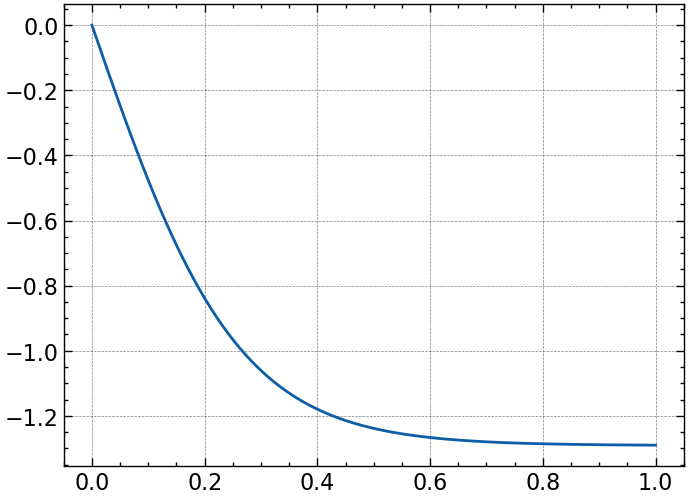

In [66]:
plt.plot(t, sol.T[0])

### Coupled first order ODEs

$$ y_1' = y_1 + y_2^2 + 3x \ \ \ \ \ y_1(0) = 0 $$

$$ y_2' = 3y_1 + y_2^3 - cos(x) \ \ \ \ y_2(0) = 0 $$

Letting $S = (y_1, y_2)$ we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$. The function

In [69]:
def dSdx(S,x):
    y1, y2 = S
    return [ y1+y2**2+3*x, 3*y1 + y2**3-np.cos(x)]

y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, x)

In [72]:
y1 = sol.T[0]
y2 = sol.T[1]

In [73]:
y1

array([0.00000000e+00, 1.53914061e-04, 6.19093356e-04, 1.40076628e-03,
       2.50418953e-03, 3.93464633e-03, 5.69744401e-03, 7.79789517e-03,
       1.02413187e-02, 1.30330245e-02, 1.61783065e-02, 1.96824391e-02,
       2.35506573e-02, 2.77881638e-02, 3.24001125e-02, 3.73915921e-02,
       4.27676179e-02, 4.85331404e-02, 5.46930282e-02, 6.12520553e-02,
       6.82148995e-02, 7.55861308e-02, 8.33702071e-02, 9.15714669e-02,
       1.00194121e-01, 1.09242251e-01, 1.18719801e-01, 1.28630571e-01,
       1.38978219e-01, 1.49766252e-01, 1.60998020e-01, 1.72676732e-01,
       1.84805434e-01, 1.97387014e-01, 2.10424222e-01, 2.23919648e-01,
       2.37875730e-01, 2.52294784e-01, 2.67178978e-01, 2.82530347e-01,
       2.98350829e-01, 3.14642248e-01, 3.31406342e-01, 3.48644774e-01,
       3.66359140e-01, 3.84551013e-01, 4.03221942e-01, 4.22373488e-01,
       4.42007253e-01, 4.62124894e-01, 4.82728181e-01, 5.03819005e-01,
       5.25399429e-01, 5.47471735e-01, 5.70038442e-01, 5.93102385e-01,
      

In [74]:
y2

array([ 0.        , -0.01009927, -0.0201882 , -0.03025632, -0.04029308,
       -0.05028784, -0.06022984, -0.07010824, -0.07991207, -0.08963025,
       -0.09925158, -0.10876475, -0.1181583 , -0.12742067, -0.13654013,
       -0.14550483, -0.15430276, -0.16292176, -0.17134949, -0.17957349,
       -0.18758109, -0.19535947, -0.2028956 , -0.21017629, -0.21718816,
       -0.22391762, -0.23035091, -0.23647404, -0.24227286, -0.24773298,
       -0.25283984, -0.25757866, -0.26193448, -0.26589214, -0.2694363 ,
       -0.27255142, -0.27522179, -0.27743156, -0.27916469, -0.28040501,
       -0.28113622, -0.2813419 , -0.28100554, -0.28011053, -0.27864019,
       -0.2765778 , -0.27390662, -0.27060987, -0.26667082, -0.26207275,
       -0.25679897, -0.25083288, -0.24415797, -0.2367578 , -0.22861607,
       -0.21971655, -0.21004318, -0.19957999, -0.18831112, -0.17622082,
       -0.16329341, -0.14951323, -0.13486464, -0.11933195, -0.10289936,
       -0.08555086, -0.06727014, -0.04804052, -0.02784475, -0.00

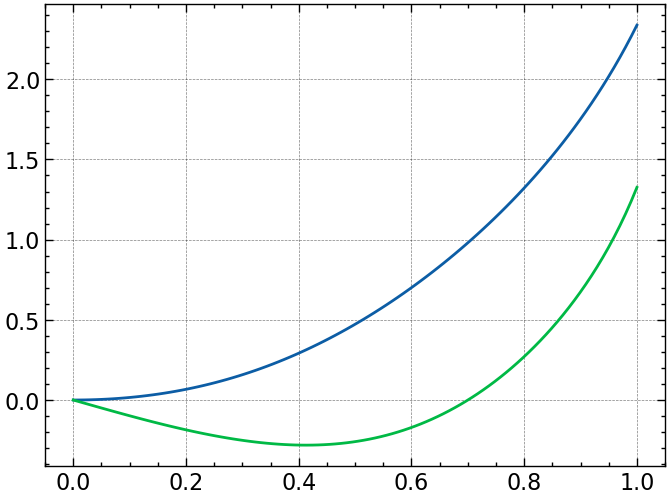

In [75]:
plt.plot(x, y1)
plt.plot(x, y2)

### Second Order ODEs

Equation for a pendulum

$$ \theta^" - sin(\theta) = 0 $$

Scipy can only solve coupled first order ODEs, but any second order ODE can be turned into two coupled first order ODEs. The same thing goes for higher order ODEs.

Define $ w = d\theta/dt $ so that one has the following coupled ODEs

$$ dw/dt = sin(\theta) , \ \ \ d\theta/dt = w $$

$ Let\ S = (\theta,w) $

In [86]:
def dSdt(S,t):
    theta, w = S
    return [ w, np.sin(theta)]

theta0 = np.pi/4
w0 = 0 
S0 = (theta0, w0)

In [91]:
t = np.linspace(0, 20, 100)
sol = odeint(dSdt, S0, t)

In [92]:
theta, w = sol.T

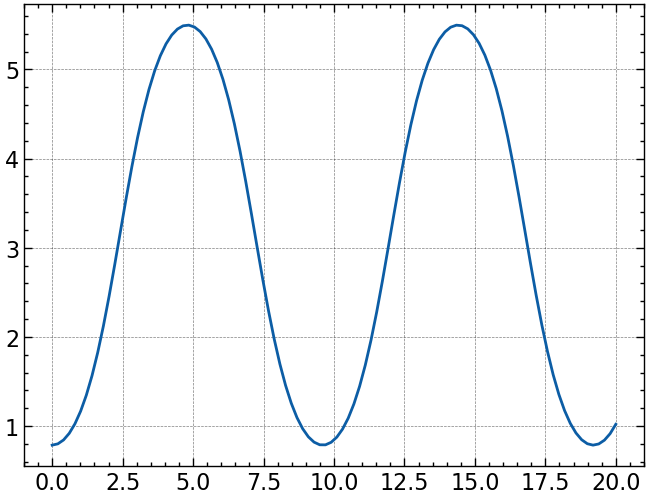

In [94]:
plt.plot(t, theta)
plt.show()

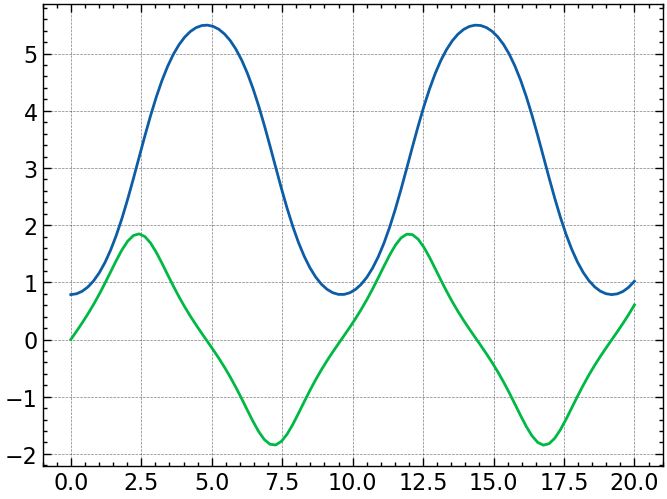

In [95]:
plt.plot(t, theta)
plt.plot(t, w)

### Fourier Transform

The discrete Fourier transform is defined as 

$$ y[k] = \sum_{n=0}^{N-1} e^{-2\pi\iota(k/N)}x[n] $$

k/N represents a specefic frequency (dimensionless)
can be converted to a frequency (Hz) if you know the spacing in x

In [129]:
t = np.linspace(0, 10*np.pi, 100)
x = np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + 0.1*np.random.randn(len(x))

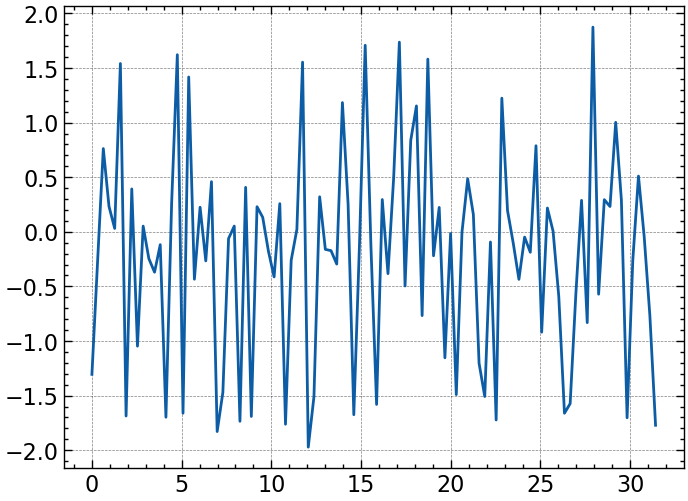

In [130]:
plt.plot(t,x)

In [ ]:
from scipy.fft import fft, fftfreq

In [135]:
np.diff(t)[0]

0.3173325912716963

In [133]:
N = len(x)
y = fft(x)

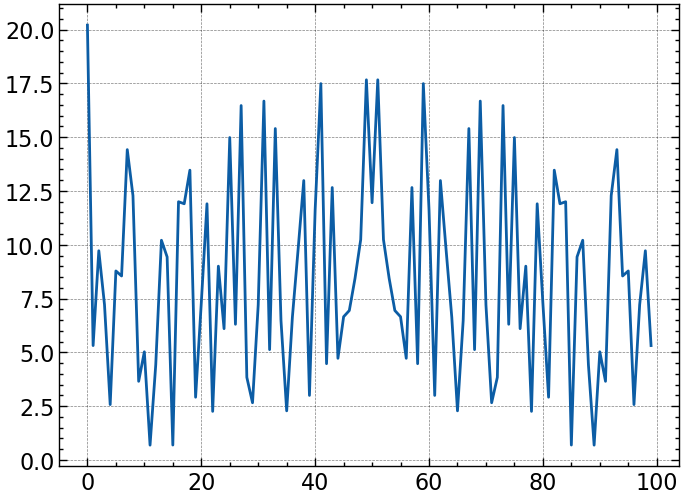

In [134]:
plt.plot(np.abs(y))

In [142]:
N = len(x)
y = fft(x)[:N//2]
f = fftfreq(N, np.diff(t)[0])[:N//2]

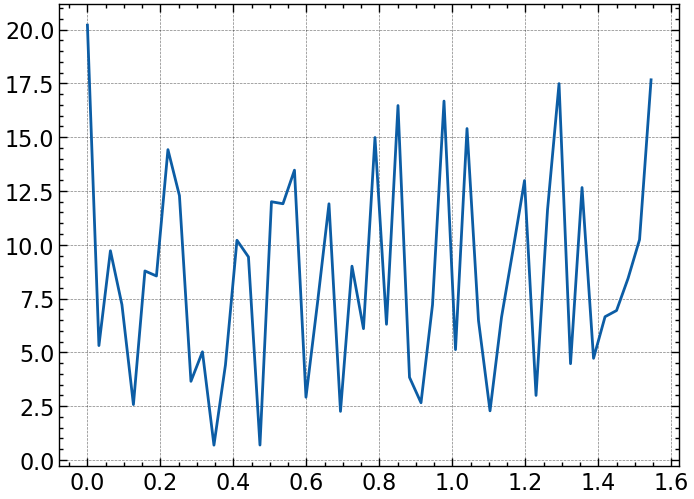

In [143]:
plt.plot(f, np.abs(y))

# Linear Algebra

## Basics

(1) Triangular matrices :

$$ \begin{bmatrix} 3 & 0 & 0 & 0\\
2 & 1 & 0 & 0\\
1 & 0 & 1 & 0\\
1 & 1 & 1 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 4 \\ 2 \\ 4 \\ 2 \end{bmatrix} $$

In [27]:
from scipy.linalg import solve_triangular

In [31]:
A = np.array([[3, 0, 0, 0],
              [2, 1, 0, 0],
              [1, 0, 1, 0],
              [1, 1, 1, 1]])
B = np.array([4, 2, 4, 2])
x = solve_triangular(A, B, lower=True)

In [33]:
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

(2) Toeplitz Matrices (matrices with constant diagonals) :

$$ \begin{bmatrix} 1 & -1 & 2 & 3\\ 3 & 1 & -1 & 2\\ 6 & 3 & 1 & -1\\ 10 & 6 & 3 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 1\\2\\2\\5 \end{bmatrix} $$

In [40]:
from scipy.linalg import solve_toeplitz, toeplitz

c = np.array([1, 3, 6, 10])      # First column of Toeplitz matrix
r = np.array([1, -1, 2, 3])      # First row of Toeplitz matrix
b = np.array([1, 2, 2, 5])
x = solve_toeplitz((c,r), b)

In [42]:
x

array([ 0.17741935,  0.48387097, -0.0483871 ,  0.46774194])

## Eigenvalue Problems

Eigenvalue problems can be solved using numpy, so here we focus on particular cases for optimization

In [53]:
from scipy.linalg import eigh_tridiagonal

$$ \begin{bmatrix} 3 & -1 & 0 & 0\\ 
-1 & 3 & -1 & 0\\ 
0 & -1 & 3 & -1\\ 
0 & 0 & -1 & 3 \end{bmatrix} \vec{x} = \lambda x $$

In [85]:
d = 3*np.ones(4)
e = -1*np.ones(3)
w, v = eigh_tridiagonal(d, e)

In [87]:
w       # Eigenvalues

array([1.38196601, 2.38196601, 3.61803399, 4.61803399])

In [89]:
v      # Eigenvectors

array([[ 0.37174803,  0.60150096,  0.60150096, -0.37174803],
       [ 0.60150096,  0.37174803, -0.37174803,  0.60150096],
       [ 0.60150096, -0.37174803, -0.37174803, -0.60150096],
       [ 0.37174803, -0.60150096,  0.60150096,  0.37174803]])

In [91]:
v.T     # Taking Transpose

array([[ 0.37174803,  0.60150096,  0.60150096,  0.37174803],
       [ 0.60150096,  0.37174803, -0.37174803, -0.60150096],
       [ 0.60150096, -0.37174803, -0.37174803,  0.60150096],
       [-0.37174803,  0.60150096, -0.60150096,  0.37174803]])

In [93]:
v.T[0]    # first eigenvector

array([0.37174803, 0.60150096, 0.60150096, 0.37174803])

In [95]:
A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)

In [97]:
A@v.T[0]

array([0.51374315, 0.83125388, 0.83125388, 0.51374315])

In [99]:
w[0]*v.T[0]

array([0.51374315, 0.83125388, 0.83125388, 0.51374315])

# Special Matrices

Fiedler matrix $A_ij = |a_i - a_j|$ where $a_i$ is some sequence of numbers

In [119]:
from scipy.linalg import fiedler
fiedler([1, 4, 12, 45])

array([[ 0,  3, 11, 44],
       [ 3,  0,  8, 41],
       [11,  8,  0, 33],
       [44, 41, 33,  0]])

Toeplitz matrices(matrices with constant diagonals) :

In [125]:
from scipy.linalg import toeplitz
toeplitz([1,2,3,0,0], [1,4,5,6,0,0])

array([[1, 4, 5, 6, 0, 0],
       [2, 1, 4, 5, 6, 0],
       [3, 2, 1, 4, 5, 6],
       [0, 3, 2, 1, 4, 5],
       [0, 0, 3, 2, 1, 4]])

# Statistics

$ Example\ 1 : \beta \ distribution $

$$ f(x,a,b) = \left(\frac{\Gamma(a+b)x^{a-1}(1-x)^{b-1}}{\Gamma(a) \Gamma(b) }\right) ,\ \ \ \ \ \ \ \ \ 0\le x \le 1 $$

In [2]:
from scipy.stats import beta

Basic Statistics

In [15]:
a, b = 2.5, 3.1
mean, var, std = beta.stats(a, b, moments='mvs')

In [7]:
mean

0.44642857142857145

In [9]:
var

0.03744395485466914

In [13]:
std

0.14570980275128334

Probability DIstribution Plotting :

In [18]:
beta.ppf(0.99, a, b)      # It gives a portion of area under the curve, given the percentage.

0.871845893864339

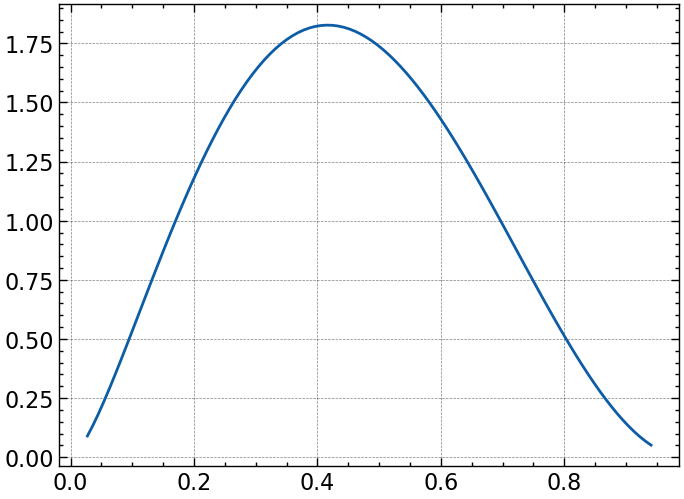

In [28]:
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

Generating Random Varaibles :

### Example 2 : Gaussian Distribution

$$ f(x; \mu , \sigma) = \left(\frac{1}{\sqrt{2\pi\sigma^2}} \right) exp \left(-\frac{(x-\mu)^2}{(\sigma)^2} \right) ,\ \ \ \ \ \ \ \ \ \ -\infty \le x \le \infty $$

In [48]:
from scipy.stats import norm

In [50]:
mu, sigma = 1, 2
mean, var, std = norm.stats(loc=mu, scale=sigma, moments='mvs')

In [52]:
mean

1.0

In [54]:
var

4.0

In [56]:
std

0.0

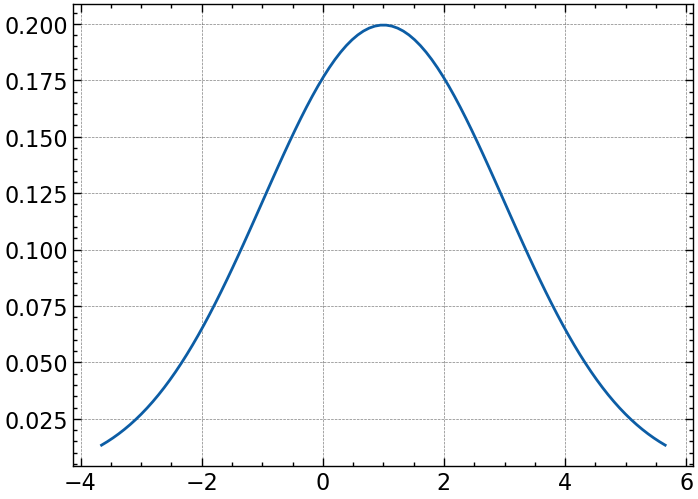

In [85]:
x = np.linspace(norm.ppf(0.01, mu, sigma), norm.ppf(0.99, mu, sigma), 100)
y = norm.pdf(x, mu, sigma)
plt.plot(x, y)   # where pdf : Probability Distribution Function

### Example 3 : Multinomial Distribution

 $$ f(x_{1},x_{2},...,x_{k};p_{1},p_{2},...,p_{k},n)\ =\ \frac{n!}{x_{1}!...x_{k}!}p_{1}^{x_{1}}p_{2}^{x_{2}}...p_{k}^{x_{k}} $$

Rolling a dice

In [72]:
from scipy.stats import multinomial

In [78]:
p = np.ones(6)/6
multinomial.pmf([6,0,0,0,0,0], n=6, p=p )   # where pmf : Probability Mass Function

2.143347050754453e-05

In [82]:
multinomial.rvs(n=100, p=p, size=5)

array([[14, 16, 21, 18, 16, 15],
       [20, 13, 20, 16, 15, 16],
       [30, 13, 12, 17,  9, 19],
       [20, 17, 18, 13, 18, 14],
       [15, 18, 22, 12, 15, 18]])

### Example 4 : Generating Random Numbers from your own distribution

$$ f(x;a_{1}, a_{2}, b_{1}, b_{2})\ =\ \frac{1}{2(a_{1}b_{1} + a_{2}b_{2})}\Bigg(b_{1}\ exp\Bigg(-\sqrt{\frac{x}{a_{1}}}\Bigg) + b_{2}\ exp\Bigg(-\sqrt{\frac{x}{a_{2}}}\Bigg)\Bigg)\ \ \ \ \ ,\ \ \ \ \ 0\ \leq\ x\ \leq\ \infty $$

In [3]:
import scipy.stats as st

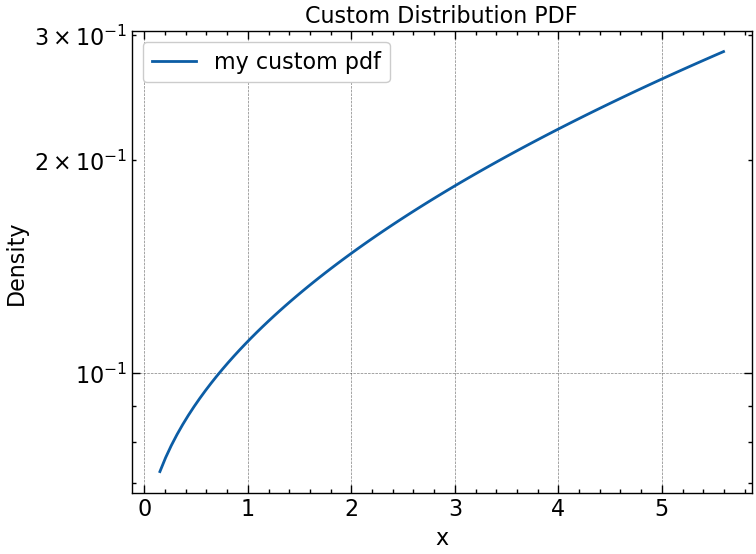

In [68]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Define your custom distribution class
class my_dist(st.rv_continuous):
    def __init__(self, a1, a2, b1, b2, *args, **kwargs):
        super().__init__(*args, **kwargs)  # Call the parent constructor
        self.a1 = a1
        self.a2 = a2
        self.b1 = b1
        self.b2 = b2

    def _pdf(self, x):
        # Use the class attributes directly
        return 1 / (2 * (self.a1 * self.b1 + self.a2 * self.b2) * (self.b1 * np.exp(-np.sqrt(x / self.a1))) + self.b2 * np.exp(-np.sqrt(x / self.a2)))

    
# Define parameters
a1, a2, b1, b2 = 2, 3, 1, 2

# Initialize your custom distribution with parameters
my_rv = my_dist(a1, a2, b1, b2, a=0, b=np.inf)

# Generate x values using the ppf method
x = np.linspace(my_rv.ppf(0.01), my_rv.ppf(0.99), 100)

# Compute the PDF values
y = my_rv.pdf(x)

# Plot the result
plt.plot(x, y, label='my custom pdf')
plt.semilogy()
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Custom Distribution PDF')
plt.legend()
plt.show()
